<a href="https://colab.research.google.com/github/hada97/indie_case/blob/main/case_indiecap_Adailson_Guimaraes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções para o Case:
* Renomeie o seu arquivo substituindo *"NOME_SOBRENOME"* por suas informações
* Você deve escrever seu código depois do *#####SEU CODIGO COMECA AQUI#####.*
* Todos os resultados de cada exercício deverão ser printados
* Extras
    * Comentar os códigos
    * Redigir explicação
    * Incluir referências

Boa sorte


In [ ]:
##### PRINTE O SEU NOME #####

print("Adailson Costa Guimaraes")

## 1-) Maior Retorno Possível

O arquivo *Adj_close_px.xlsx* contém o preço ajustado de um conjunto de ações (fonte : *Yahoo Finance*). Forneça uma tabela que informe para cada ação , qual seria o maior retorno possível que algum investidor poderia ter obtido.

**Extra**:

Informe a data de início e de fim que o investidor deveria ter segurado a ação para obter tal retorno

#Filtra, Agrupa e analisa os Dados das Ações

In [ ]:
import pandas as pd

# Carregar os dados do Excel
arquivo = 'Adj_close_px.xlsx'
df = pd.read_excel(arquivo)

# Inicializar uma lista para armazenar os resultados
resultados = []

# Agrupar por Ticker (ação)
for acao in df['Ticker'].unique():
    # Filtrar os dados para a ação específica
    dados_acao = df[df['Ticker'] == acao].sort_values(by='Date')

    # Inicializar as variáveis para o maior retorno
    maior_retorno = 0
    data_inicio = None
    data_fim = None

    # Procurar o maior retorno possível
    for i in range(len(dados_acao)):
        for j in range(i+1, len(dados_acao)):
            # Cálculo do retorno entre os dias i e j
            retorno = (dados_acao['Adj_PX_CLOSE'].iloc[j] - dados_acao['Adj_PX_CLOSE'].iloc[i]) / dados_acao['Adj_PX_CLOSE'].iloc[i]
            if retorno > maior_retorno:
                maior_retorno = retorno
                data_inicio = dados_acao['Date'].iloc[i]
                data_fim = dados_acao['Date'].iloc[j]

    # Armazenar os resultados
    resultados.append({
        'Ação': acao,
        'Maior Retorno (%)': maior_retorno * 100,  # Convertendo para porcentagem
        'Data Início': data_inicio,
        'Data Fim': data_fim
    })

# Criar um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Formatar as colunas de retorno e datas
df_resultados['Maior Retorno (%)'] = df_resultados['Maior Retorno (%)'].apply(lambda x: f"{x:.2f}")
df_resultados['Data Início'] = df_resultados['Data Início'].dt.strftime('%Y-%m-%d')
df_resultados['Data Fim'] = df_resultados['Data Fim'].dt.strftime('%Y-%m-%d')



#Formata o DF

In [ ]:
# Exibir os resultados de forma mais bonita
styled_df = df_resultados.style \
    .set_table_styles([
        # Cabeçalho com azul claro
        {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'black'), ('font-weight', 'bold')]},  # Cabeçalho azul claro
        # Estilo das células do corpo
        {'selector': 'tbody td', 'props': [('text-align', 'center')]},  # Alinhar as células ao centro
        # Linhas pares em cinza claro
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},  # Linhas pares em cinza claro
        # Linhas ímpares em cinza mais escuro
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#d9d9d9')]},  # Linhas ímpares em cinza mais escuro
        # Adicionar padding nas células
        {'selector': 'td', 'props': [('padding', '10px')]},
        # Estilo da tabela (bordas e largura)
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
        # Bordas nas células
        {'selector': 'td, th', 'props': [('border', '1px solid #ddd')]},
    ]) \
    .set_properties(**{'text-align': 'center', 'color': 'black'})  # Definir o texto como preto

# Exibir a tabela estilizada
styled_df

,Ação,Maior Retorno (%),Data Início,Data Fim
0,AERI3.SA,88.64,2022-12-16,2023-05-11
1,ALPA4.SA,60.97,2023-04-26,2023-06-15
2,B3SA3.SA,56.50,2022-07-15,2022-11-04
3,BLAU3.SA,45.14,2022-06-06,2022-11-01
4,CASH3.SA,51.49,2022-07-26,2022-08-15
5,DIRR3.SA,167.86,2022-06-13,2023-12-27
6,EGIE3.SA,32.30,2022-12-15,2023-12-27
7,ELET6.SA,47.56,2023-03-21,2023-12-27
8,FLRY3.SA,46.52,2022-06-29,2023-12-22
9,GFSA3.SA,456.16,2022-12-15,2023-01-05


## 2-) Carros FIPE  


O arquivos *carros* contém informações dos preços de veículos praticados entre 2018 e 2020, de acordo com a tabela FIPE. Neste exercício você será livre para fazer a análise de dados. Limpe os dados, retire estatísticas e crie gráficos conforme achar melhor. Tente pelo menos responder as seguintes questões: qual fabricante teve a maior média de preços,  qual foi a tendência de preços no período, como que ocorre a distribuição de tipo de combustível entre as marcas.

**Dica**

A coluna *veiculo* possui 3 informações concatenadas : marca, modelo e tipo de combustível separados por **"_"** (*underline*)




In [ ]:
import pandas as pd

# Carregar o arquivo CSV
carros = pd.read_csv('carros.csv')

# Separar a coluna 'veiculo' em 'marca', 'modelo' e 'tipo de combustivel' usando '_'
# Usamos expand=True para criar as colunas e n=2 para limitar a separação em até 3 colunas
carros[['marca', 'modelo', 'tipo de combustivel']] = carros['veiculo'].str.split('_', expand=True, n=2)

# Se a coluna 'tipo de combustivel' estiver vazia, preencher com 'Flex'
carros['tipo de combustivel'] = carros['tipo de combustivel'].fillna('Flex')

# Remover a coluna 'veiculo' original
carros = carros.drop('veiculo', axis=1)

# Remover as colunas 'tipo' e 'cod_fipe', mas manter a coluna 'data'
carros = carros.drop(['tipo', 'cod_fipe'], axis=1)

# Reorganizar as colunas para a ordem desejada: data, marca, modelo, tipo de combustivel, preco
carros = carros[['data', 'marca', 'modelo', 'tipo de combustivel', 'preco']]

# Verificar se há caracteres de quebra de linha ou outros problemas de formatação nas colunas
carros = carros.applymap(lambda x: str(x).replace('\n', ' ').replace('\r', ' ').replace(',', '.') if isinstance(x, str) else x)

# Salvar o DataFrame sem o índice (sem a primeira coluna que é o índice)
carros.to_csv('carros_sem_index.csv', index=False)

# Selecionar as 10 primeiras linhas
carros_top_10 = carros.head(20)

# Usar o Pandas Styler para centralizar os nomes das colunas
carros_styled = carros_top_10.style.set_table_styles(
    [
        {'selector': 'th', 'props': [('text-align', 'center')]},  # Centraliza os cabeçalhos das colunas
        {'selector': 'td', 'props': [('text-align', 'center')]}   # Centraliza o conteúdo das células
    ]
)

# Exibir as primeiras 10 linhas estilizadas
carros_styled


<ipython-input-9-e29ec69780b1>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  carros = carros.applymap(lambda x: str(x).replace('\n', ' ').replace('\r', ' ').replace(',', '.') if isinstance(x, str) else x)


,data,marca,modelo,tipo de combustivel,preco
0,2018-01-01,Ford,Ka+ Sedan 1.0 SE/SE PLUS TiVCT Flex 4p,,45729
1,2018-01-01,Ford,Ka+ Sedan 1.0 SEL TiCVT Flex 4p,,51519
2,2018-01-01,Ford,Ka+ Sedan 1.5 ADVANCED 16V Flex 4p,,53581
3,2018-01-01,Ford,Ka+ Sedan 1.5 SE/SE PLUS 16V Flex 4p,,50445
4,2018-01-01,Ford,Ka+ Sedan 1.5 SEL 16V Flex 4p,,56994
5,2018-01-01,Hyundai,HB20 C./C.Plus/C.Style 1.6 Flex 16V Mec.,,52450
6,2018-01-01,Hyundai,HB20 5 Anos 1.6 Flex 16V Aut.,,60573
7,2018-01-01,Hyundai,HB20 Comfort Style 1.0 TB Flex 12V Mec.,,52544
8,2018-01-01,Hyundai,HB20 C.Style/C.Plus 1.6 Flex 16V Aut.,,57444
9,2018-01-01,Hyundai,HB20 Comf./C.Plus/C.Style 1.0 Flex 12V,,44768


#mostra Média por fabricante

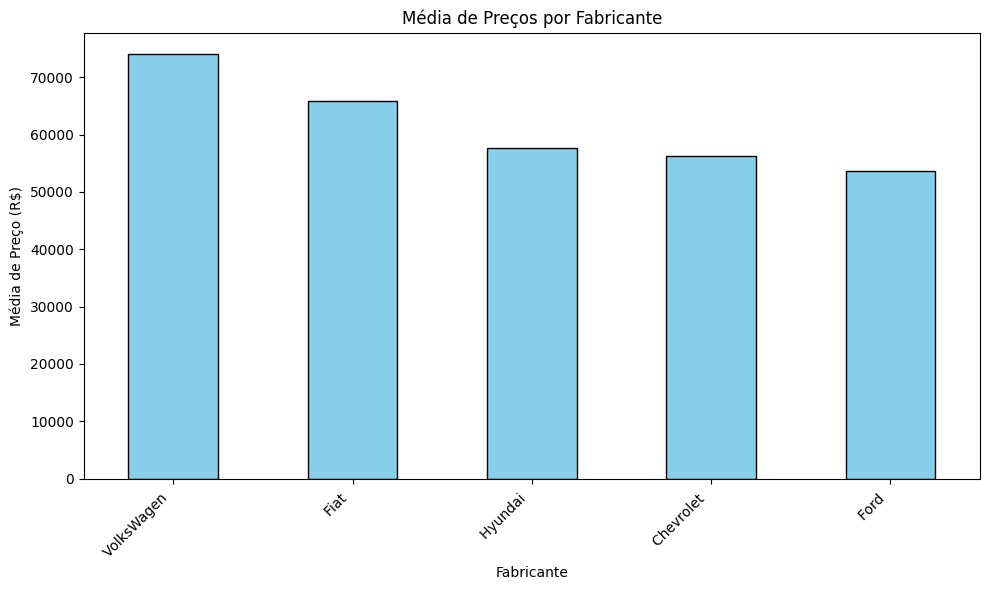

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reorganizar as colunas para a ordem desejada: marca, modelo, tipo de combustivel, preco
carros = carros[['marca', 'modelo', 'tipo de combustivel', 'preco']]

# Calcular a média de preços por fabricante (marca)
media_precos = carros.groupby('marca')['preco'].mean().sort_values(ascending=False)

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
media_precos.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Média de Preços por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Média de Preço (R$)')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos das marcas para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()

#Tendencia de preço últimos 12 meses

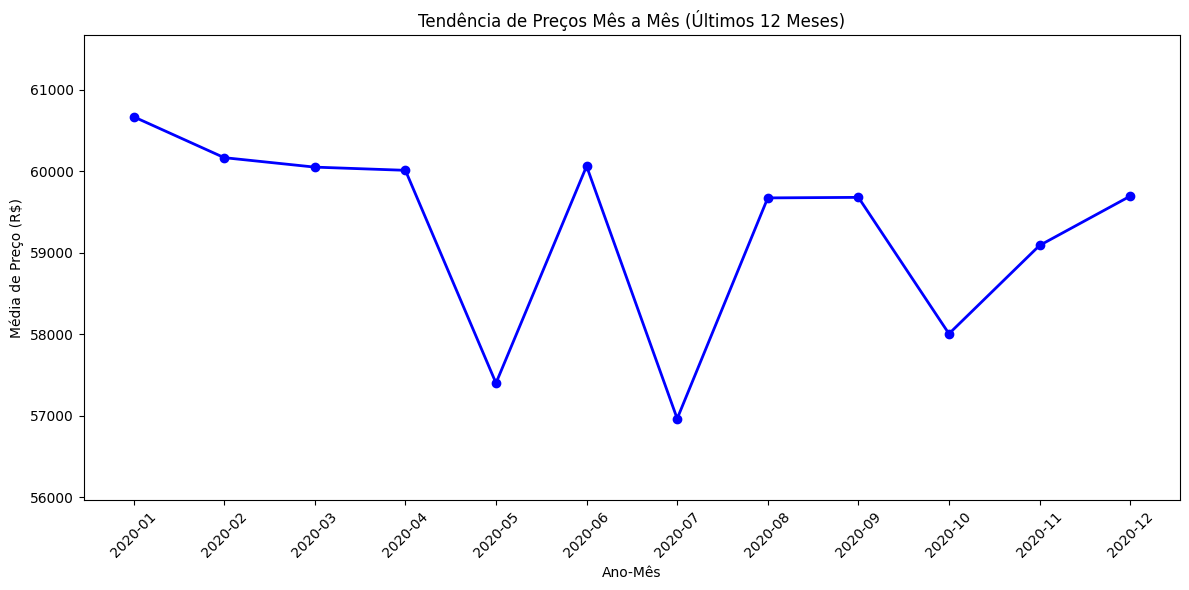

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
carros = pd.read_csv('carros.csv')

# Separar as duas primeiras partes da coluna 'veiculo' (marca_modelo) usando '_'
carros[['marca', 'modelo']] = carros['veiculo'].str.split('_', expand=True, n=1)

# Separar a última parte (tipo de combustivel) pela palavra "flex" (incluindo Flexpower, FlexFuel, etc.)
carros['tipo de combustivel'] = carros['veiculo'].str.extract(r'(Flex.*)', expand=False)

# Remover a coluna 'veiculo' original
carros = carros.drop('veiculo', axis=1)

# Manter a coluna 'data' e remover as colunas 'tipo' e 'cod_fipe'
carros = carros.drop(['tipo', 'cod_fipe'], axis=1)

# Reorganizar as colunas para a ordem desejada: data, marca, modelo, tipo de combustivel, preco
carros = carros[['data', 'marca', 'modelo', 'tipo de combustivel', 'preco']]

# Garantir que a coluna 'data' esteja no formato datetime
carros['data'] = pd.to_datetime(carros['data'], errors='coerce')  # Converte a coluna para datetime

# Garantir que a coluna 'preco' seja numérica, convertendo valores de texto para float
carros['preco'] = pd.to_numeric(carros['preco'], errors='coerce')  # Coerce irá transformar erros em NaN

# Remover valores ausentes (NaN)
carros = carros.dropna(subset=['preco'])

# Criar uma coluna 'ano_mes' que contém ano e mês para o agrupamento
carros['ano_mes'] = carros['data'].dt.to_period('M')  # Agrupando por ano e mês

# Agrupar os dados por 'ano_mes' e calcular a média de preços
precos_por_mes = carros.groupby('ano_mes')['preco'].mean()

# Se o gráfico estiver com muitas barras, selecione um período específico
# Por exemplo, vamos pegar os últimos 12 meses
precos_por_mes = precos_por_mes.tail(12)

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))

# Plotando o gráfico de linhas
plt.plot(precos_por_mes.index.astype(str), precos_por_mes.values, marker='o', color='b', linestyle='-', linewidth=2)

# Ajustar a escala do eixo Y para valores próximos
plt.ylim(min(precos_por_mes) - 1000, max(precos_por_mes) + 1000)  # Ajuste dinâmico dos limites do eixo Y

# Personalizar o gráfico
plt.title('Tendência de Preços Mês a Mês (Últimos 12 Meses)')
plt.xlabel('Ano-Mês')
plt.ylabel('Média de Preço (R$)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo X para facilitar a leitura
plt.tight_layout()

# Exibir o gráfico
plt.show()


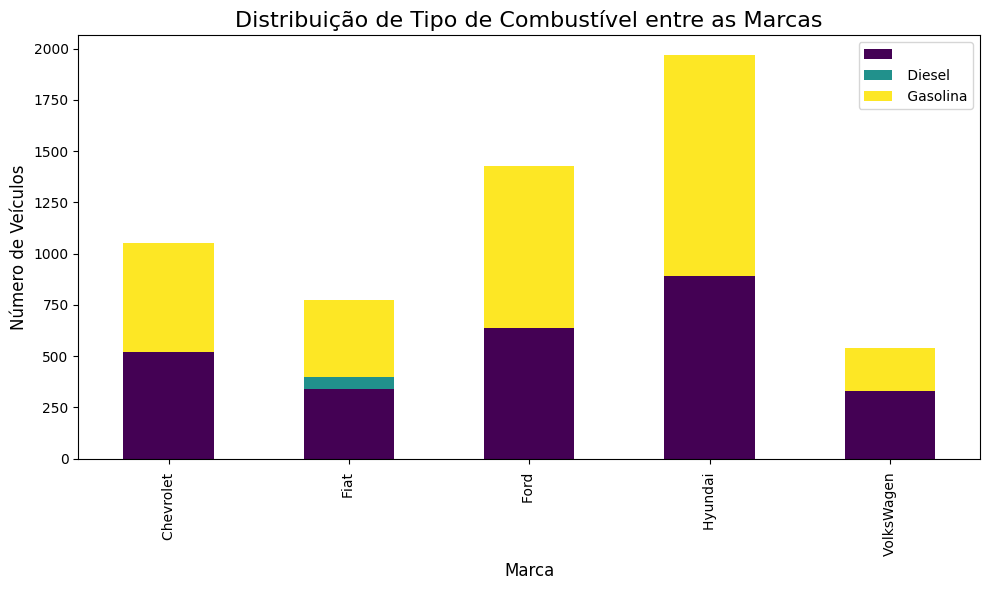

In [ ]:
import matplotlib.pyplot as plt

# Contar a quantidade de cada tipo de combustível para cada marca
distribuicao_combustivel = carros.groupby(['marca', 'tipo de combustivel']).size().unstack(fill_value=0)

# Plotar um gráfico de barras para mostrar a distribuição de tipo de combustível entre as marcas
ax = distribuicao_combustivel.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Ajustar a legenda para garantir que a cor roxa seja atribuída ao "Flex"
handles, labels = ax.get_legend_handles_labels()

# Atualizar a legenda, substituindo o valor vazio por "Flex"
labels = [label if label != '' else 'Flex' for label in labels]

# Configurar o título e rótulos
plt.title('Distribuição de Tipo de Combustível entre as Marcas', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Número de Veículos', fontsize=12)
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo X para facilitar a leitura

# Atualizar a legenda com as novas etiquetas
ax.legend(handles, labels)

# Exibir o gráfico
plt.tight_layout()
plt.show()


## 3- ) Regra de Simpson

É muito complicado obter uma integral exata para determinados tipos de funções. Quando desejamos somente o valor da integral, e não sua forma analítica, pode ser útil calcular a integral por aproximação. A fórmula de Simpson permite-nos aproximar o valor de uma determinada integral se soubermos calcular os pontos da função original utilizando a expressão abaixo:

$$
\int_{a}^{b} f(x) \, dx \approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \cdots +  2f(x_{n-2}) +  4f(x_{n-1}) + f(x_n) \right]
$$

onde $h = \frac{b - a}{n}$, $x_i = a + i \cdot h$, e $n$ deve ser um número par.

Crie uma função $f(x) = x^2 +10$.

Em seguida, escreva um programa que calcule a integral de $f(x)$ utilizando a fórmula de Simpson, considerando $n = 100$. Teste sua função para $a = 15$ e $b = 55$.


In [ ]:
#####SEU CODIGO COMECA AQUI#####

def f(x):
    # Função dada f(x) = x^2 + 10
    return x**2 + 10

def simpson(a, b, n):
    h = (b - a) / n
    soma = f(a) + f(b)

    # Somando os termos internos da fórmula de Simpson
    for i in range(1, n, 2):
        soma += 4 * f(a + i * h)
    for i in range(2, n, 2):
        soma += 2 * f(a + i * h)

    return (h / 3)

# Definindo os valores a = 15, b = 55 e n = 100
a = 15
b = 55
n = 100

# Calculando a integral
resultado = simpson(a, b, n)
print(f"O valor da integral aproximada é: {resultado}")


O valor da integral aproximada é: 54733.333333333336


## 4-)  Gerencie seus investimentos

Neste desafio, você escreverá um programa que acompanhará o crescimento de um investimento ao longo do tempo.

Valor Inicial
Um depósito inicial, chamado de valor principal, é realizado. A cada ano, o valor aumenta com base em uma porcentagem fixa, chamada taxa anual de retorno.

Exemplo:
Um valor principal de $100 com uma taxa anual de retorno de 5% aumenta, no primeiro ano, em $5. No segundo ano, o aumento é de 5% sobre o novo valor de $105, o que resulta em um aumento de $5,25.

Função invest
Escreva uma função chamada invest com três parâmetros: o valor principal, a taxa anual de retorno e o número de anos a ser calculado. A assinatura da função pode ser algo como:

`def invest(amount, rate, years)`

A função então deverá retornar um DataFrame contendo duas colunas , a primeira com o ano de referência e a segunda o valor do investimento, arredondado para 2 casas decimais com o o cifrão "$"

Exemplo de execução:
Chamando invest(100, 0.05, 4) deve imprimir o seguinte:

| Ano | Valor   |
|-----|---------|
| 1   | $105.00 |
| 2   | $110.25 |
| 3   | $115.76 |
| 4   | $121.55 |



In [ ]:
import pandas as pd

def invest(amount, rate, years):
    # Criar uma lista para armazenar os anos e os valores dos investimentos
    data = []

    # Inicializar o valor do investimento com o valor principal
    value = amount

    # Calcular o valor do investimento para cada ano
    for year in range(1, years + 1):
        # Armazenar o ano e o valor do investimento com o símbolo de cifrão
        data.append([year, f"${value:.2f}"])

        # Atualizar o valor do investimento para o próximo ano
        value += value * rate / 100

    # Criar o DataFrame com os dados
    df = pd.DataFrame(data, columns=["Ano", "Valor"])


    return df

# Exemplo de uso da função
df_investimento = invest(100, 5, 10)
print(df_investimento)


   Ano    Valor
0    1  $100.00
1    2  $105.00
2    3  $110.25
3    4  $115.76
4    5  $121.55
5    6  $127.63
6    7  $134.01
7    8  $140.71
8    9  $147.75
9   10  $155.13
